In [ ]:
#Random Forest trained with non-linear data, with data augmentation SAME for each label and using labels-v4
#Chooses between the 3 best predictions from the model (3best)

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import os
import time

In [2]:
# nombre de instancia
# número restricciones
# número variables
# si es lineal o no (true / false)
# porcentaje de restricciones unarias, binarias, porcentaje de ternarias, porcentaje cuaternarias o más 
# porcentaje de terminos unarios, binarios, porcentaje de ternarios, porcentaje cuaternarios o más 
# porcentaje de terminos en la función obj
# porcentaje de terminos positivos/negativos en restricciones
# porcentaje de terminos positivos/negativos en funcion obj
# timestep
# solver (label)

main_path="/global/scratch/users/cpezov/AAPBO/"
d_path=main_path+"datasets-v4/"

columns = ["# constraints","# variables","linearity","% 1 term constr","% 2 terms constr","% 3 terms constr","% 4+ terms constr","% degree 1 terms","% degree 2 terms","% degree 3 terms","% degree 4+ terms","% terms in obj func","% positive in constr","% positive in obj func","timestep","solver"]

df = pd.read_csv(main_path+"data_features.csv", usecols=columns)
solvers=df["solver"].to_list()

Benchmark121/normalized-NG.dot_luby_50null50mast_rapportOE1.0_TMAX180_K192_cod2.opb
Benchmark121/normalized-NG.dot_luby_50null20mast_rapportOE2.0_TMAX60_K192_cod2.opb
Benchmark121/normalized-NG.dot_luby_50null0mast_rapportOE1.0_TMAX15_K192_cod2.opb
Benchmark122/normalized-NG.dot_unif_0null10mast_rapportOE1.0_TMAX60_K192_cod2.opb
Benchmark123/normalized-NG.dot_unif_10null20mast_rapportOE2.0_TMAX60_K192_cod2.opb
Benchmark123/normalized-NG.dot_unif_10null20mast_rapportOE1.0_TMAX300_K192_cod2.opb
Benchmark123/normalized-NG.dot_unif_10null0mast_rapportOE2.0_TMAX15_K192_cod2.opb
Benchmark124/normalized-NG.dot_unif_20null20mast_rapportOE2.0_TMAX300_K192_cod2.opb
Benchmark124/normalized-NG.dot_unif_20null20mast_rapportOE2.0_TMAX15_K192_cod2.opb
Benchmark124/normalized-NG.dot_unif_20null20mast_rapportOE1.0_TMAX120_K192_cod2.opb
Benchmark124/normalized-NG.dot_unif_20null0mast_rapportOE2.0_TMAX180_K192_cod2.opb
Benchmark124/normalized-NG.dot_unif_20null0mast_rapportOE1.0_TMAX300_K192_cod2.opb
Ben

Benchmark177/normalized-randb87834.cudf.trendy.opb
Benchmark177/normalized-randf7d077.cudf.trendy.opb
Benchmark177/normalized-randa491d5.cudf.trendy.opb
Benchmark177/normalized-randd1cab2.cudf.trendy.opb
Benchmark177/normalized-rand6d579e.cudf.trendy.opb
Benchmark177/normalized-rand659e05.cudf.trendy.opb
Benchmark177/normalized-randee102b.cudf.trendy.opb
Benchmark177/normalized-rand5c0b12.cudf.trendy.opb
Benchmark177/normalized-rand8177e7.cudf.trendy.opb
Benchmark178/normalized-rand085d8a.cudf.trendy.opb
Benchmark178/normalized-rand271a0d.cudf.trendy.opb
Benchmark178/normalized-randd92c9f.cudf.trendy.opb
Benchmark178/normalized-randec6fe1.cudf.trendy.opb
Benchmark178/normalized-rand767898.cudf.trendy.opb
Benchmark178/normalized-randc5b1f2.cudf.trendy.opb
Benchmark178/normalized-randb54299.cudf.trendy.opb
Benchmark178/normalized-rand00ebc7.cudf.trendy.opb
Benchmark178/normalized-rand27da90.cudf.trendy.opb
Benchmark178/normalized-randf794d2.cudf.trendy.opb
Benchmark178/normalized-randc5f

Benchmark187/normalized-j12017_7.std.opb
Benchmark187/normalized-j12020_8.std.opb
Benchmark187/normalized-j12019_2.std.opb
Benchmark187/normalized-j1205_7.std.opb
Benchmark187/normalized-j12019_5.std.opb
Benchmark187/normalized-j1209_1.std.opb
Benchmark187/normalized-j1209_3.std.opb
Benchmark187/normalized-j12013_5.std.opb
Benchmark187/normalized-j12018_6.std.opb
Benchmark187/normalized-j1204_1.std.opb
Benchmark187/normalized-j1207_10.std.opb
Benchmark187/normalized-j12015_5.std.opb
Benchmark187/normalized-j1201_2.std.opb
Benchmark187/normalized-j12020_5.std.opb
Benchmark187/normalized-j1202_7.std.opb
Benchmark187/normalized-j1204_10.std.opb
Benchmark187/normalized-j12020_7.std.opb
Benchmark187/normalized-j1206_4.std.opb
Benchmark187/normalized-j12024_7.std.opb
Benchmark187/normalized-j12037_6.std.opb
Benchmark187/normalized-j12040_4.std.opb
Benchmark187/normalized-j12021_8.std.opb
Benchmark187/normalized-j12038_4.std.opb
Benchmark187/normalized-j12025_7.std.opb
Benchmark187/normalized

Benchmark202/normalized-fir08_area_opers.opb
Benchmark203/normalized-fir04_area_partials.opb
Benchmark203/normalized-fir02_area_partials.opb
Benchmark203/normalized-fir07_area_partials.opb
Benchmark203/normalized-fir05_area_partials.opb
Benchmark203/normalized-fir06_area_partials.opb
Benchmark203/normalized-fir03_area_partials.opb
Benchmark203/normalized-fir10_area_partials.opb
Benchmark203/normalized-fir09_area_partials.opb
Benchmark203/normalized-fir08_area_partials.opb
Benchmark204/normalized-matrix_5x3_8.opb
Benchmark204/normalized-matrix_5x3_5.opb
Benchmark204/normalized-matrix_5x3_6.opb
Benchmark204/normalized-matrix_5x3_3.opb
Benchmark204/normalized-matrix_5x3_2.opb
Benchmark204/normalized-matrix_5x3_7.opb
Benchmark204/normalized-matrix_5x3_9.opb
Benchmark204/normalized-matrix_5x3_1.opb
Benchmark204/normalized-matrix_5x3_10.opb
Benchmark204/normalized-matrix_5x3_4.opb
Benchmark205/normalized-fir01_trarea_ac.opb
Benchmark205/normalized-fir02_trarea_ac.opb
Benchmark206/normalized-

Benchmark223/normalized-mis_200_25_5.opb
Benchmark223/normalized-mis_200_25_4.opb
Benchmark223/normalized-mis_200_25_3.opb
Benchmark223/normalized-mis_200_25_2.opb
Benchmark223/normalized-mis_200_25_1.opb
Benchmark223/normalized-mis_200_10_5.opb
Benchmark223/normalized-mis_200_10_4.opb
Benchmark223/normalized-mis_200_10_3.opb
Benchmark223/normalized-mis_200_10_2.opb
Benchmark223/normalized-mis_200_10_1.opb
Benchmark224/normalized-mis_500_60_5.opb
Benchmark224/normalized-mis_500_60_4.opb
Benchmark224/normalized-mis_500_60_3.opb
Benchmark224/normalized-mis_500_60_2.opb
Benchmark224/normalized-mis_500_60_1.opb
Benchmark224/normalized-mis_500_25_5.opb
Benchmark224/normalized-mis_500_25_4.opb
Benchmark224/normalized-mis_500_25_3.opb
Benchmark224/normalized-mis_500_25_2.opb
Benchmark224/normalized-mis_500_25_1.opb
Benchmark224/normalized-mis_500_10_5.opb
Benchmark224/normalized-mis_500_10_4.opb
Benchmark224/normalized-mis_500_10_3.opb
Benchmark224/normalized-mis_500_10_2.opb
Benchmark224/nor

Benchmark228/factor-mod-size=7-P0=107-P1=13-P2=17-P3=127-P4=13-P5=53-P6=73-P7=59-B.opb
Benchmark228/factor-mod-size=7-P0=59-P1=103-P2=101-P3=43-P4=37-P5=37-P6=17-P7=23-B.opb
Benchmark228/factor-mod-size=7-P0=97-P1=11-P2=73-P3=43-P4=127-P5=127-P6=37-P7=127-P8=5-B.opb
Benchmark228/factor-mod-size=7-P0=5-P1=47-P2=89-P3=41-P4=37-P5=113-P6=47-P7=127-P8=37-B.opb
Benchmark228/factor-mod-size=7-P0=53-P1=5-P2=67-P3=53-P4=17-P5=103-P6=29-P7=71-P8=47-B.opb
Benchmark228/factor-mod-size=7-P0=13-P1=53-P2=127-P3=83-P4=37-P5=107-P6=67-P7=41-P8=113-B.opb
Benchmark228/factor-mod-size=7-P0=71-P1=79-P2=101-P3=109-P4=107-P5=97-P6=127-P7=127-P8=67-B.opb
Benchmark228/factor-mod-size=7-P0=97-P1=43-P2=127-P3=89-P4=59-P5=127-P6=43-P7=127-P8=67-P9=17-B.opb
Benchmark228/factor-mod-size=7-P0=83-P1=113-P2=127-P3=71-P4=61-P5=43-P6=71-P7=41-P8=13-P9=71-B.opb
Benchmark228/factor-mod-size=7-P0=53-P1=109-P2=43-P3=13-P4=17-P5=101-P6=59-P7=7-P8=29-P9=107-B.opb
Benchmark228/factor-mod-size=7-P0=89-P1=13-P2=37-P3=97-P4=101-

Benchmark231/normalized-mps-v2-20-10-agg2.opb
Benchmark231/normalized-mps-v2-20-10-agg3.opb
Benchmark231/normalized-mps-v2-20-10-scorpion.opb
Benchmark231/normalized-mps-v2-20-10-forplan.opb
Benchmark231/normalized-mps-v2-20-10-sctap1.opb
Benchmark231/normalized-mps-v2-20-10-etamacro.opb
Benchmark231/normalized-mps-v2-20-10-degen2.opb
Benchmark231/normalized-mps-v2-20-10-tuff.opb
Benchmark231/normalized-mps-v2-20-10-grow15.opb
Benchmark231/normalized-mps-v2-20-10-scsd1.opb
Benchmark231/normalized-mps-v2-20-10-seba.opb
Benchmark231/normalized-mps-v2-20-10-grow22.opb
Benchmark231/normalized-mps-v2-20-10-gfrd-pnc.opb
Benchmark231/normalized-mps-v2-20-10-standata.opb
Benchmark231/normalized-mps-v2-20-10-standgub.opb
Benchmark231/normalized-mps-v2-20-10-scrs8.opb
Benchmark231/normalized-mps-v2-20-10-bnl1.opb
Benchmark231/normalized-mps-v2-20-10-scsd6.opb
Benchmark231/normalized-mps-v2-20-10-maros.opb
Benchmark231/normalized-mps-v2-20-10-shell.opb
Benchmark231/normalized-mps-v2-20-10-fit1p.o

Benchmark273/normalized-mps-v2-20-10-nazareth.opb
Benchmark273/normalized-mps-v2-20-10-maros.opb
Benchmark274/normalized-factor-sizeN=20-sizeP=11-sizeQ=20-900543.opb
Benchmark274/normalized-factor-sizeN=20-sizeP=11-sizeQ=20-900543-max.opb
Benchmark274/normalized-factor-sizeN=20-sizeP=11-sizeQ=20-496708-max.opb
Benchmark274/normalized-factor-sizeN=20-sizeP=11-sizeQ=20-496708.opb
Benchmark275/normalized-factor-sizeN=40-sizeP=21-sizeQ=40-793490986.opb
Benchmark275/normalized-factor-sizeN=40-sizeP=21-sizeQ=40-793490986-max.opb
Benchmark275/normalized-factor-sizeN=40-sizeP=21-sizeQ=40-289612555.opb
Benchmark275/normalized-factor-sizeN=40-sizeP=21-sizeQ=40-289612555-max.opb
Benchmark276/normalized-factor-sizeN=60-sizeP=31-sizeQ=60-784051325.opb
Benchmark276/normalized-factor-sizeN=60-sizeP=31-sizeQ=60-784051325-max.opb
Benchmark276/normalized-factor-sizeN=60-sizeP=31-sizeQ=60-472296155.opb
Benchmark276/normalized-factor-sizeN=60-sizeP=31-sizeQ=60-472296155-max.opb
Benchmark277/normalized-fac

Benchmark306/normalized-mps-v2-20-10-aflow40b.opb
Benchmark307/normalized-mps-v2-20-10-air05.opb
Benchmark307/normalized-mps-v2-20-10-air04.opb
Benchmark308/normalized-mps-v2-20-10-nw04.opb
Benchmark309/normalized-mps-v2-20-10-t1717.opb
Benchmark310/normalized-mps-v2-20-10-vpm2.opb
Benchmark311/normalized-mps-v2-20-10-seymour1.opb
Benchmark311/normalized-mps-v2-20-10-neos9.opb
Benchmark312/normalized-reduced-mps-v2-20-10-ds.opb
Benchmark313/normalized-reduced-mps-v2-20-10-fome12.opb
Benchmark313/normalized-reduced-mps-v2-20-10-fome13.opb
Benchmark314/normalized-ws97-3.opb
Benchmark315/normalized-mps-v2-20-10-bm23.opb
Benchmark316/normalized-mps-v2-20-10-cracpb1.opb
Benchmark318/normalized-mps-v2-20-10-lseu.opb
Benchmark318/normalized-mps-v2-20-10-lp4l.opb
Benchmark318/normalized-mps-v2-20-10-l152lav.opb
Benchmark319/normalized-mps-v2-20-10-mod008.opb
Benchmark319/normalized-mps-v2-20-10-mod010.opb
Benchmark320/normalized-mps-v2-20-10-p0033.opb
Benchmark320/normalized-mps-v2-20-10-p0040

Benchmark329/normalized-reduced-mps-v2-20-10-noswot.opb
Benchmark329/normalized-reduced-mps-v2-20-10-fiber.opb
Benchmark329/normalized-reduced-mps-v2-20-10-harp2.opb
Benchmark329/normalized-reduced-mps-v2-20-10-vpm2.opb
Benchmark329/normalized-reduced-mps-v2-20-10-timtab1.opb
Benchmark329/normalized-reduced-mps-v2-20-10-pp08aCUTS.opb
Benchmark329/normalized-reduced-mps-v2-20-10-liu.opb
Benchmark329/normalized-reduced-mps-v2-20-10-pp08a.opb
Benchmark329/normalized-reduced-mps-v2-20-10-timtab2.opb
Benchmark329/normalized-reduced-mps-v2-20-10-nsrand-ipx.opb
Benchmark329/normalized-reduced-mps-v2-20-10-air05.opb
Benchmark329/normalized-reduced-mps-v2-20-10-rout.opb
Benchmark329/normalized-reduced-mps-v2-20-10-aflow30a.opb
Benchmark329/normalized-reduced-mps-v2-20-10-mkc.opb
Benchmark329/normalized-reduced-mps-v2-20-10-air04.opb
Benchmark329/normalized-reduced-mps-v2-20-10-swath.opb
Benchmark329/normalized-reduced-mps-v2-20-10-modglob.opb
Benchmark329/normalized-reduced-mps-v2-20-10-roll300

Benchmark341/normalized-aim-200-3_4-yes1-4.opb
Benchmark341/normalized-aim-200-6_0-yes1-1.opb
Benchmark341/normalized-aim-200-6_0-yes1-2.opb
Benchmark341/normalized-aim-200-6_0-yes1-3.opb
Benchmark341/normalized-aim-200-6_0-yes1-4.opb
Benchmark343/normalized-f600.opb
Benchmark343/normalized-f1000.opb
Benchmark343/normalized-f2000.opb
Benchmark344/normalized-g125.17.opb
Benchmark344/normalized-g125.18.opb
Benchmark344/normalized-g250.15.opb
Benchmark344/normalized-g250.29.opb
Benchmark345/normalized-hanoi4.opb
Benchmark345/normalized-hanoi5.opb
Benchmark346/normalized-ii8a1.opb
Benchmark346/normalized-ii8a2.opb
Benchmark346/normalized-ii32e1.opb
Benchmark346/normalized-ii32c1.opb
Benchmark346/normalized-ii32b1.opb
Benchmark346/normalized-ii8a3.opb
Benchmark346/normalized-ii32c2.opb
Benchmark346/normalized-ii8b1.opb
Benchmark346/normalized-ii32b2.opb
Benchmark346/normalized-ii32e2.opb
Benchmark346/normalized-ii32d1.opb
Benchmark346/normalized-ii8a4.opb
Benchmark346/normalized-ii32c3.opb


Benchmark363/normalized-m50_100_10_15.r.opb
Benchmark363/normalized-dk512x.r.opb
Benchmark363/normalized-m50_100_50_50.r.opb
Benchmark363/normalized-m50_100_70_70.r.opb
Benchmark363/normalized-m100_50_40_40.r.opb
Benchmark363/normalized-m100_50_10_10.r.opb
Benchmark363/normalized-m100_50_30_30.r.opb
Benchmark363/normalized-m50_100_30_30.r.opb
Benchmark363/normalized-m50_100_90_90.r.opb
Benchmark363/normalized-maincont.r.opb
Benchmark363/normalized-m100_100_10_15.r.opb
Benchmark363/normalized-m100_100_10_30.r.opb
Benchmark363/normalized-m100_100_30_30.r.opb
Benchmark363/normalized-m100_100_50_50.r.opb
Benchmark363/normalized-m100_100_70_70.r.opb
Benchmark363/normalized-m100_100_90_90.r.opb
Benchmark363/normalized-m100_100_10_10.r.opb
Benchmark363/normalized-ex4inp.r.opb
Benchmark363/normalized-m100_300_10_10.r.opb
Benchmark363/normalized-m100_300_10_14.r.opb
Benchmark363/normalized-m100_300_10_15.r.opb
Benchmark363/normalized-m100_300_10_20.r.opb
Benchmark363/normalized-ricks.r.opb
Benc

Benchmark374/normalized-factor-size=9-P=239-Q=487.opb
Benchmark374/normalized-factor-size=9-P=127-Q=491.opb
Benchmark374/normalized-factor-size=9-P=127-Q=499.opb
Benchmark374/normalized-factor-size=9-P=13-Q=179.opb
Benchmark374/normalized-factor-size=9-P=131-Q=137.opb
Benchmark374/normalized-factor-size=9-P=131-Q=157.opb
Benchmark374/normalized-factor-size=9-P=131-Q=163.opb
Benchmark374/normalized-factor-size=9-P=131-Q=277.opb
Benchmark374/normalized-factor-size=9-P=223-Q=499.opb
Benchmark374/normalized-factor-size=9-P=139-Q=191.opb
Benchmark374/normalized-factor-size=9-P=149-Q=163.opb
Benchmark374/normalized-factor-size=9-P=149-Q=167.opb
Benchmark374/normalized-factor-size=9-P=223-Q=379.opb
Benchmark374/normalized-factor-size=9-P=149-Q=251.opb
Benchmark374/normalized-factor-size=9-P=149-Q=271.opb
Benchmark374/normalized-factor-size=9-P=149-Q=293.opb
Benchmark374/normalized-factor-size=9-P=211-Q=479.opb
Benchmark374/normalized-factor-size=9-P=149-Q=397.opb
Benchmark374/normalized-facto

In [3]:
x=df[["# constraints","# variables","linearity","% 1 term constr","% 2 terms constr","% 3 terms constr","% 4+ terms constr","% degree 1 terms","% degree 2 terms","% degree 3 terms","% degree 4+ terms","% terms in obj func","% positive in constr","% positive in obj func","timestep"]]
y=df[['solver']]

#agrupar diferentes timestpes de cada instancia en un mismo set
random.seed(9) #same seed to generate same random numbers as other models
train_indx=[]
inst_train=[]
test_indx=[]
inst_test=[]
for i in range(0,3128): # v4
    r = random.randint(0,2)
    if(r==2):
        inst_test.append(i)
        for j in range(0,500):
            test_indx.append(500*i+j)
    else:
        inst_train.append(i)
        for j in range(0,500):
            train_indx.append(500*i+j)

x_train=x.iloc[train_indx]
x_test=x.iloc[test_indx]
y_train=y.iloc[train_indx]
y_test=y.iloc[test_indx]
y_train_og=y.iloc[train_indx]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1027000, 15)
(537000, 15)
(1027000, 1)
(537000, 1)


In [4]:
#Data augmentation para training set de instancias con clases distintas a gurobi (5)

indx_dis=[] #indexes of instances with disadvantaged labels

#identificar instancias que tengan clase distinta a gurobi
for i in inst_train:
    has_dis=False
    for j in range(500):
        ind=500*i+j
        if(solvers[ind]!=5):
            has_dis=True
            break
    if(has_dis):
        for j in range(500):
            indx_dis.append(500*i+j)

print(len(indx_dis))
print(len(train_indx), end="\n\n")

#agregar las instancias al final de x_train e y_train
x_train_dis=x.iloc[indx_dis]
y_train_dis=y.iloc[indx_dis]

x_train=pd.concat([x_train,x_train_dis])
y_train=pd.concat([y_train,y_train_dis])

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

674500
1027000

(1701500, 15)
(537000, 15)
(1701500, 1)
(537000, 1)


In [5]:
rf_model = RandomForestClassifier(n_estimators=100, max_features="sqrt", criterion="gini",random_state=3)
rf_model.fit(np.nan_to_num(x_train.astype(np.float32)), y_train.values.ravel())

RandomForestClassifier(random_state=3)

In [6]:
y_pred = rf_model.predict(np.nan_to_num(x_test.astype(np.float32)))

In [7]:
print("Accuracy",metrics.accuracy_score(y_test.values.ravel(), y_pred))
pred = rf_model.predict_proba(np.nan_to_num(x_test.astype(np.float32)))
print("Loss",metrics.log_loss(y_test.values.ravel(), pred))

Accuracy 0.710635009310987
Loss 4.611086234544368


## Select between the best 3 predictions (3best)

In [8]:
pred

array([[0.        , 0.63998413, 0.        , ..., 0.        , 0.        ,
        0.36001587],
       [0.        , 0.68115729, 0.        , ..., 0.        , 0.        ,
        0.31884271],
       [0.        , 0.64221717, 0.        , ..., 0.        , 0.        ,
        0.35778283],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [9]:
#Buscar en pred, las mejores opciones: 1ra, 2da y 3ra opcion (3best)

n_best = 3 #3best

# pred es un np.array con shape (537000, 8)
n_inst=len(pred) # 537000: n_inst_test*500
n_solv=len(pred[0])

#guardar en arreglo el numero de solver en cada posicion (1ro, 2do, 3er), por cada instancia (3best)
best_sol = np.zeros((n_best,n_inst))
best_sol[0] = y_pred

c=np.zeros(n_solv)

#2da mejor opcion
for i in range(n_inst):
    b2=-1
    same=True
    for j in range(n_solv):
        if(j==best_sol[0][i]):
            continue
        #inicializar
        if(b2==-1):
            b2=j
        #busca el 2do mejor
        elif(pred[i][j]>pred[i][b2]):
            b2=j

        #verificar si todos son la misma prob
        if(pred[i][j]!=pred[i][b2]):
            same=False
    #if todos son iguales, elige gurobi(5)
    if(same):
        b2=5
    best_sol[1][i]=b2
    c[b2]=c[b2]+1

print(c)

[ 43950.  15090.  37032.  21596.  23227. 323618.  39369.  33118.]


In [10]:
#3ra mejor opcion (3best)
for i in range(n_inst):
    b3=-1
    same=True
    for j in range(n_solv):
        if(j==best_sol[0][i] or j==best_sol[1][i]): #si es igual a la primera o segunda opcion
            continue
        #inicializar
        if(b3==-1):
            b3=j
        #busca el 3er mejor
        elif(pred[i][j]>pred[i][b3]):
            b3=j

        #verificar si todos son la misma prob
        if(pred[i][j]!=pred[i][b3]):
            same=False
    #if todos son iguales, elige roundingsat(7) (3best: roundingsat es la 2da mejor opcion, luego de gurobi)
    if(same):
        b3=7
    best_sol[2][i]=b3

In [11]:
#Obtener de data_graph timesteps y valores de cada solver

data = main_path+"results/processed_data/data_graph-v4.txt"

with open(data,'r') as text:
    time_unit = text.readline().replace("\n","")
    solvers = text.readline().split() #Solver names
    datasets = text.readline().split() #Dataset names
    instances = [] #Instances names
    N_SOLVERS = len(solvers)
    N_DATASETS = len(datasets)
    N_INSTANCES = [] #Number of instances for each dataset
    N_POINTS = [] #Number of points for each solver for each instance
    results = [] #Contains every point of every instance
    plot_max = [] #Artificial final point of every plot for better visualization
    maxmax = 0 #Maximum artificial final point
    for d in range(N_DATASETS):
        N_INSTANCES.append(int(text.readline()))
        for i in range(N_INSTANCES[d]):
            instances.append(text.readline().replace("\n",""))
            max = 0
            aux = []
            for s in range(N_SOLVERS):
                line = text.readline().split()
                count_points = 0
                for point in line:
                    count_points = count_points + 1
                    point = point.split(':')
                    aux.append([float(point[0]), float(point[1]), s])
                    #aux.append([math.log(float(point[0]),2), float(point[1]), s])
                N_POINTS.append(count_points)
                if aux[-1][0]>max:
                    max = aux[-1][0]
            results.append(aux)
            plot_max.append(int(max+max*0.1))
            if maxmax < max:
                maxmax = max
    bt = text.readline().split()
    bar_times = []
    for b in bt:
        bar_times.append(float(b))
    maxmax = maxmax * 1.1

In [12]:
new_times=[]
for b in bar_times:
    new_times.append(b/n_best)

#Obtener results solo de test set
res_test = [results[index] for index in inst_test]

In [13]:
#Obtener las soluciones, para todos los solvers, para todas las instancias de test, en cada uno de los new_timesteps

import math

res_solvers = np.full((N_SOLVERS, len(res_test), 500),np.nan) #for each test instance, each new_time, we save the value of the result for each solver
#if a solver has no solution yet, nan is stored

for i in range(len(res_test)):
    for t_count in range(len(new_times)):
        t=new_times[t_count]
        for point in res_test[i]: #itera por todos los resultados (con sus respectivos tiempos, valor y solver)
            if (point[0]<t or math.isclose(point[0],t)): #está dentro del tiempo new_time (menor o igual)
                solution=point[1]
                s=point[2]
                res_solvers[s][i][t_count]=solution

In [14]:
#Buscar el mejor valor entre los 3 solvers (3best), para cada <instancia, new_timestep>

#Solvers 0:No solution, 1:Clasp, 2:NaPS, 3:OpenWBO-lsu, 4:OpenWBO-oll, 5:Gurobi, 6:LS-PBO, 7:RoundingSAT
## OBS: en res_test, solvers estan enumerados sin considerar 0:No solution

''' opciones: (3best)
- 3 solvers, todos con solución - se elige el solver con mejor sol (o cualquiera si las sols son iguales)
- 3 solvers, solo 2 tienen solucion - entre los con solucion, se elige el mejor
- 3 solvers, solo 1 tiene solucion - se elige el con solucion
- 3 solvers, todos sin solucion - se elige cualquiera
- 1 no_sol, hay solvers con solucion - se elige el mejor entre los solvers con solucion
- 1 no_sol, 2 solvers sin solucion - se elige "no_sol"
'''

real_best = np.full((len(res_test),500),np.nan) #Guarda el numero del mejor solver

for i in range(len(res_test)):
    for j in range(len(new_times)):
        
        val=np.full(n_best, np.nan)
        solv=np.full(n_best, np.nan)
        for k in range(n_best):
            solv[k]=best_sol[k][500*i+j] #Numero de solvers en best_sol van desde el 0 al 7 (incluye "No Sol")
            
            if(solv[k]!=0):
                val[k]=res_solvers[int(solv[k]-1)][i][j]
        
        best=-1
        for k in range(n_best):
            if(best==-1 and not(np.isnan(val[k]))):
                best=k
            elif(not(np.isnan(val[k]))):
                if(val[k]<val[best]): #minimizacion
                    best=k
        
        if(best==-1): #todos eran nan
            sinsol=False
            for k in range(n_best):
                if(solv[k]==0):
                    sinsol=True
            if(sinsol):
                real_best[i][j]=0
            else:
                real_best[i][j]=solv[0] #si ninguno tiene solucion, se elige el primero
        else:
            real_best[i][j]=solv[best]

In [15]:
y_pred_best=real_best.flatten()
print("Accuracy",metrics.accuracy_score(y_test.values.ravel(), y_pred_best))

Accuracy 0.7892849162011173


In [16]:
#Accuracy per timestep

accs=[]
y_test_i=[[] for i in range(500)]
y_pred_i=[[] for i in range(500)]

test_len=int(y_test.shape[0]/500)

for j in range(test_len):
    for i in range(500):
        y_test_i[i].append(y_test.values.ravel()[500*j+i])
        y_pred_i[i].append(y_pred_best[500*j+i])

for i in range(500):
    accs.append(metrics.accuracy_score(y_test_i[i], y_pred_i[i]))

accs

[0.7858472998137802,
 0.7532588454376163,
 0.7625698324022346,
 0.7662942271880819,
 0.770949720670391,
 0.7672253258845437,
 0.7672253258845437,
 0.7662942271880819,
 0.7662942271880819,
 0.7681564245810056,
 0.7662942271880819,
 0.7681564245810056,
 0.7690875232774674,
 0.7644320297951583,
 0.7681564245810056,
 0.7700186219739292,
 0.7700186219739292,
 0.7681564245810056,
 0.7672253258845437,
 0.7644320297951583,
 0.770949720670391,
 0.7737430167597765,
 0.7756052141527002,
 0.7718808193668529,
 0.7746741154562383,
 0.7737430167597765,
 0.7802607076350093,
 0.7793296089385475,
 0.7849162011173184,
 0.7802607076350093,
 0.7783985102420856,
 0.7802607076350093,
 0.7783985102420856,
 0.7783985102420856,
 0.7821229050279329,
 0.7793296089385475,
 0.7811918063314711,
 0.7830540037243948,
 0.7830540037243948,
 0.7858472998137802,
 0.7821229050279329,
 0.7830540037243948,
 0.7839851024208566,
 0.7783985102420856,
 0.7793296089385475,
 0.7793296089385475,
 0.7811918063314711,
 0.781191806331

In [16]:
#Save
y_pred_np=real_best
f = open(main_path+"models/v4/randomForest_nonlinear-v4-3best/results/y_preds.txt", "w")
np.savetxt(f,y_pred_np.reshape(y_pred_np.shape[0],-1),fmt='%s')
f.close()

In [17]:
#Feature importances
importances = rf_model.feature_importances_
feats = x.columns

i=0
while i < len(feats):
    print("Importance of feature "+feats[i]+" is "+str(importances[i]))
    i = i+1

Importance of feature # contraints is 0.1028437355957806
Importance of feature # variables is 0.08813278476674283
Importance of feature linearity is 0.00834084884161764
Importance of feature % 1 term constr is 0.04885664334431239
Importance of feature % 2 terms constr is 0.058629094028526146
Importance of feature % 3 terms constr is 0.05942643644455577
Importance of feature % 4+ terms constr is 0.0719427544797268
Importance of feature % degree 1 terms is 0.10445810550400604
Importance of feature % degree 2 terms is 0.02991276351266553
Importance of feature % degree 3 terms is 0.0014542661796870674
Importance of feature % degree 4+ terms is 0.0015445930328336294
Importance of feature % terms in obj func is 0.12623096904839545
Importance of feature % positive in constr is 0.09046798480611397
Importance of feature % positive in obj func is 0.049564512740183156
Importance of feature timestep is 0.15819450767485327


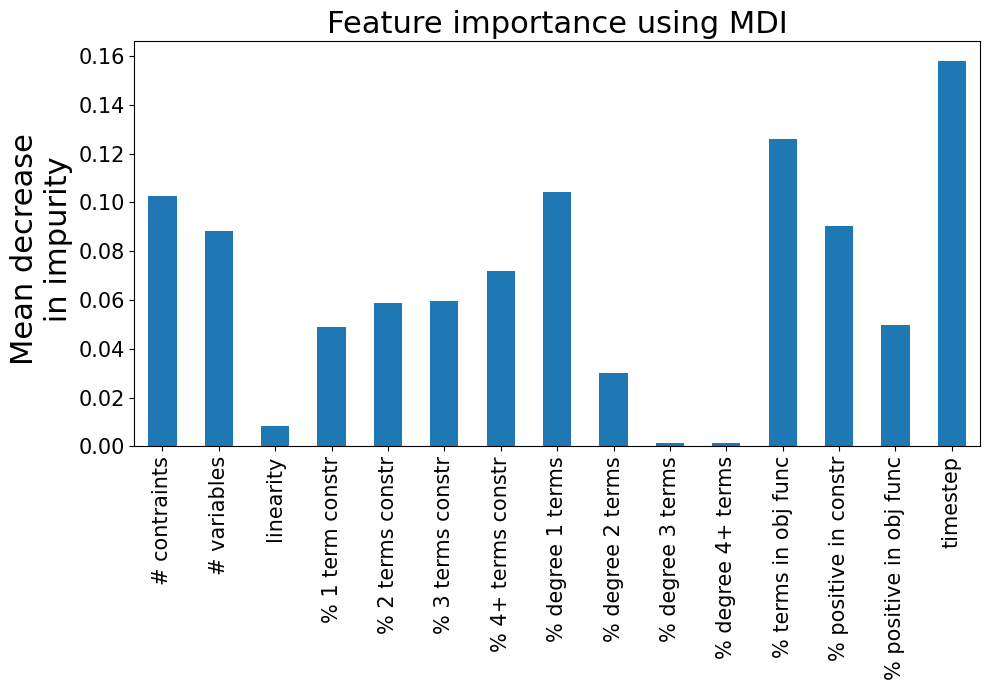

In [18]:
#Grafico feature importances
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feats)

fsize = 22

fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax, figsize = (10,7), fontsize=fsize-7)
forest_importances.plot.bar(ax=ax, figsize = (10,7), fontsize=fsize-7)
plt.xticks(rotation=90, fontsize=fsize-7)
ax.set_title("Feature importance using MDI", fontsize=fsize)
ax.set_ylabel("Mean decrease \n in impurity", fontsize=fsize)
fig.tight_layout()

#print(importances)

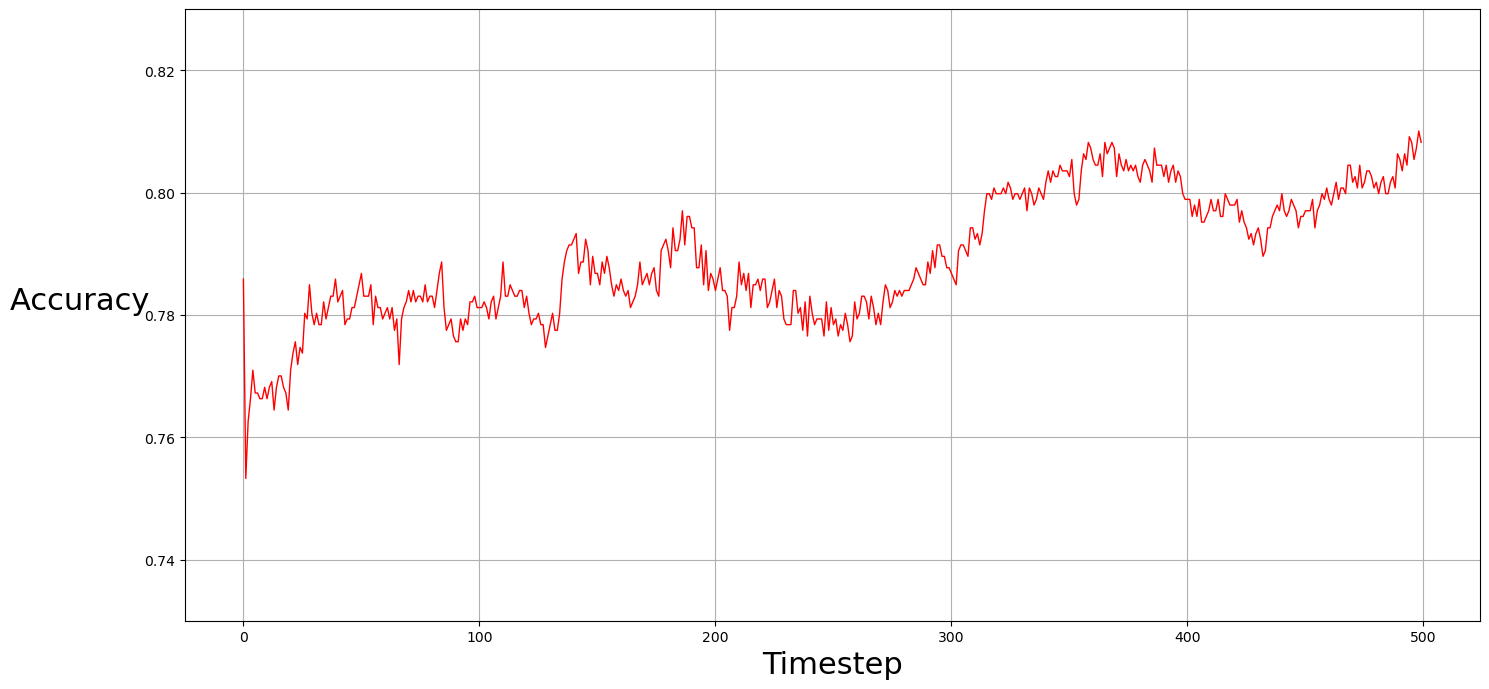

In [19]:
#Graph features vs timestep

ax_x = range(500)

plt.rcParams["figure.figsize"] = [15, 7]
plt.rcParams["figure.autolayout"] = True

plt.grid()
plt.plot(ax_x, accs, color="red", linewidth=1)

fsize=22
plt.ylabel("Accuracy            ", fontsize=fsize, rotation=0)
plt.xlabel("Timestep", fontsize=fsize)

plt.ylim(0.73, 0.83)
#plt.ylim(0,1)

plt.show()

https://data36.com/random-forest-in-python/
